In [1]:
# === WARNINGS ===
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# === FILES ===
path = 'C:\\Users\\liong\\Jupyter Notebook\\191020_Fourth Year Project\\Parkinson-Disease-Repository\\Data\\Patient001-2019-12-05\\'

files = ['ftap-forearm\\ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5.csv',
 'ftap-forearm\\ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Gyroscope_1.4.5.csv',
 'ftap-wrist\\ftap-lvl0-wrist _S2_2019-12-05T09.44.38.283_C49948A1895C_Accelerometer_1.4.5.csv',
 'ftap-wrist\\ftap-lvl0-wrist _S2_2019-12-05T09.44.38.283_C49948A1895C_Gyroscope_1.4.5.csv']

In [3]:
# === PREPROCESSING DATA ===
import math

xyz = [3, 4, 5]
    
def calc_magnitude(df):
        
    for ax in xyz: 
        print(df.describe().loc['mean', df.columns[ax]])
#         df.iloc[:, xyz[0]] = df.iloc[:, xyz[0]].apply(lambda x : x - df.describe())
    
    df['magnitude'] = df.iloc[:, xyz[0]]**2 + df.iloc[:, xyz[1]]**2 + df.iloc[:, xyz[2]]**2
    df['magnitude'] = df['magnitude'].apply(math.sqrt)
    
    print(df.describe())
    
    return df

In [4]:
# === SIGNAL PROCESSING ===
import statistics
import numpy as np
import pandas as pd

from scipy import signal

def extract_spect(sgl, bins = 70): 
    """
    Extract the spectrograms
    """
    freqs, times, spectrogram = signal.spectrogram(sgl, fs=50.0, nperseg=bins, noverlap=bins - 1)
    df = pd.DataFrame({'time':times, 'freq':[freqs[i] for i in np.argmax(spectrogram,0)]})
    
    return df, spectrogram

def get_peaks(sgl, h = None):
    """
    Simple function to get the peaks of the signal
    
    If no minimum height is specified, the minimum height is taken to be the mean of the signal
    """
    if h is None: 
        h = statistics.mean(np.real(sgl))
    
    h = min(sgl) + (max(sgl) - min(sgl)) * 0.01
        
    # Peaks index
    i_peaks = signal.find_peaks(sgl, height = h)[0]
    
    # Value of peaks
    v_peaks = []
    
    for i in i_peaks:
        v_peaks.append(sgl[i])
        
    return i_peaks, v_peaks

In [5]:
# === PLOTTING ===
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 4
ncols = 1

fSize = (18, 5)

xyz = [3, 4, 5]

def plot_raw_data(df, title = None):
    fig = plt.figure(figsize = fSize)
    
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.plot(df.iloc[:, xyz[0]])
    ax1.plot(df.iloc[:, xyz[1]])
    ax1.plot(df.iloc[:, xyz[2]])
    
    ax1.legend()
    
    fig.suptitle(title)
    
    plt.show()

def plot_for_study(y, title = None):
    fig = plt.figure(figsize = fSize)
    
    ax1 = fig.add_subplot(nrows, ncols, 1)
    ax1.plot(y)
    ax1.set_title('Magnitude')
    
    ax2 = fig.add_subplot(nrows, ncols, 2)
    ax2 = fig.add_subplot(nrows, ncols, 3)
    ax2 = fig.add_subplot(nrows, ncols, 4)
    
    plt.show()
    
def plot(y, ypi = None, ypiv = None, hist = True, title = None):
    print(title)
    plt.figure(figsize=(8,5))
    plt.plot(y)
    plt.title(title)
    
    if ypi is not None and ypiv is not None:
        plt.plot(ypi, ypiv, 'xr')
        
    if hist is True:
        df = pd.DataFrame(y)
        df.hist()
        print(df.describe())
    
    plt.show()
    
def plot_for_study_im(df):
    True

In [6]:
# === DATA ANALYSIS ===
# Widgets
import ipywidgets as widgets

def study(df, title = None):
    """
    To study the data for truncation
    """
    # --- Title of the data being studied ---
    if title is None: 
        title = 'Unidentified data'
    
    widgetsTitle = widgets.HTML(
        value = '<b>' + title + '</b>',
        layout = widgets.Layout(
            border = 'solid 1px',
            padding = '10px'
        )
    )
    display(widgetsTitle)
    
    # Plot the raw x, y, z data
    plot_raw_data(df, title = 'Raw x-, y-, and z- signals of ' + title)
    
    # Get magnitude of data
    df = calc_magnitude(df)
    
    # Get freq vs time variation and spectogram
    df_, spectro = extract_spect(df['magnitude'].values)
    
    plot_for_study(df['magnitude'])
    
    return True

HTML(value='<b>ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5.csv</b>', layout=…

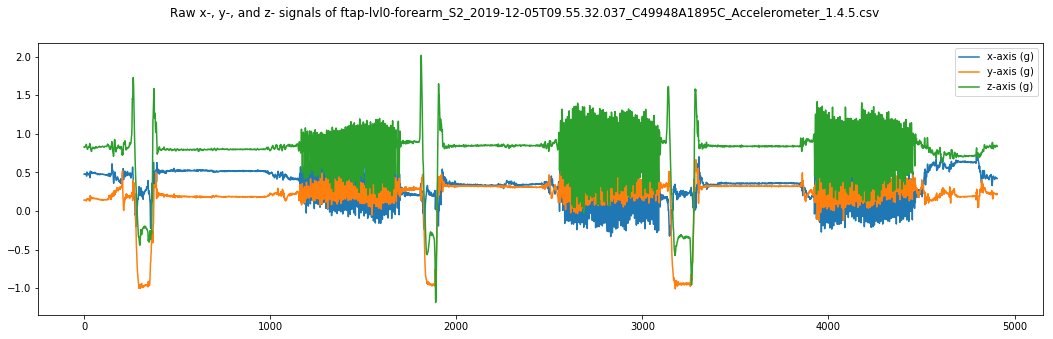

0.3358828443357787
0.19630399348003252
0.7906528117359412
         epoch (ms)  elapsed (s)   x-axis (g)   y-axis (g)   z-axis (g)  \
count  4.908000e+03  4908.000000  4908.000000  4908.000000  4908.000000   
mean   1.575540e+12    48.760414     0.335883     0.196304     0.790653   
std    2.816058e+04    28.160585     0.181712     0.278650     0.338534   
min    1.575540e+12     0.000000    -0.331000    -1.008000    -1.184000   
25%    1.575540e+12    24.380750     0.233000     0.184000     0.794000   
50%    1.575540e+12    48.760500     0.354000     0.250000     0.838000   
75%    1.575540e+12    73.141000     0.478000     0.321000     0.901000   
max    1.575540e+12    97.521000     0.837000     0.768000     2.016000   

         magnitude  
count  4908.000000  
mean      0.985507  
std       0.174616  
min       0.168345  
25%       0.961953  
50%       0.970617  
75%       1.027622  
max       2.055897  


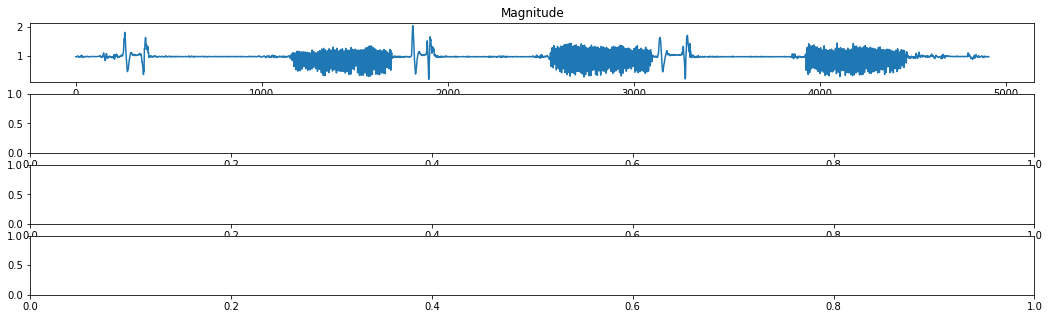

HTML(value='<b>ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Gyroscope_1.4.5.csv</b>', layout=Layo…

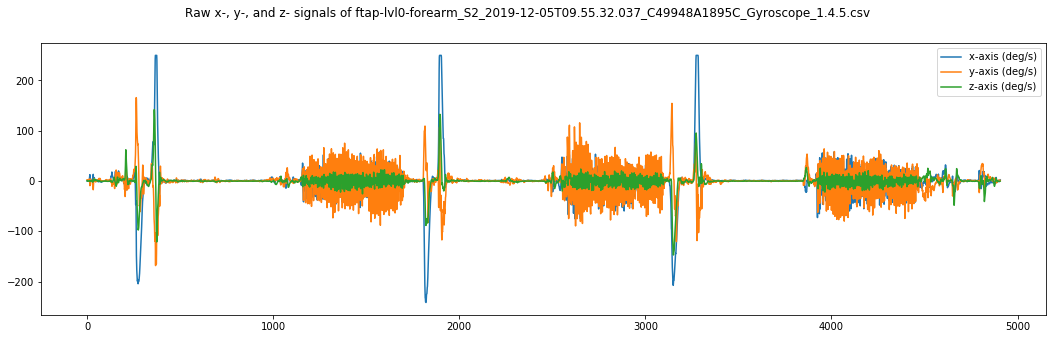

0.7514358190709058
-0.13085024449877897
-0.6700802770986122
         epoch (ms)  elapsed (s)  x-axis (deg/s)  y-axis (deg/s)  \
count  4.908000e+03  4908.000000     4908.000000     4908.000000   
mean   1.575540e+12    48.760448        0.751436       -0.130850   
std    2.816058e+04    28.160584       38.213319       24.591432   
min    1.575540e+12     0.000000     -241.433000     -168.201000   
25%    1.575540e+12    24.380750       -1.168000       -2.877000   
50%    1.575540e+12    48.760500        0.831000        0.351000   
75%    1.575540e+12    73.141000        4.214750        4.619000   
max    1.575540e+12    97.521000      249.748000      165.716000   

       z-axis (deg/s)    magnitude  
count     4908.000000  4908.000000  
mean        -0.670080    23.694214  
std         15.451216    41.752092  
min       -147.043000     0.185933  
25%         -1.762750     1.539814  
50%         -0.191000     8.215184  
75%          1.313000    30.691129  
max        141.944000   314.315

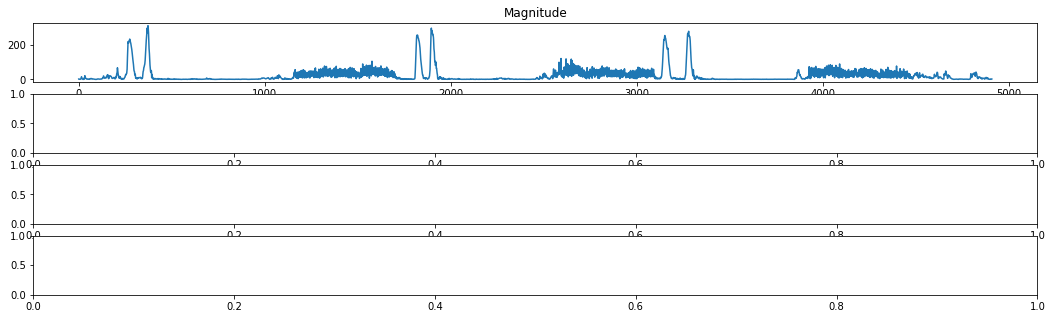

HTML(value='<b>ftap-lvl0-wrist _S2_2019-12-05T09.44.38.283_C49948A1895C_Accelerometer_1.4.5.csv</b>', layout=L…

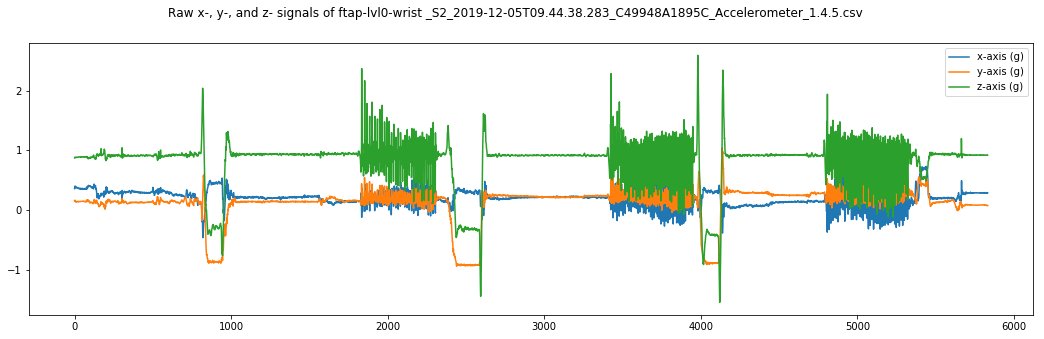

0.2009501199862871
0.1198572163181352
0.8258287624271511
         epoch (ms)  elapsed (s)   x-axis (g)   y-axis (g)   z-axis (g)  \
count  5.834000e+03  5834.000000  5834.000000  5834.000000  5834.000000   
mean   1.575539e+12    57.961907     0.200950     0.119857     0.825829   
std    3.347247e+04    33.472471     0.123888     0.293784     0.392666   
min    1.575539e+12     0.000000    -0.464000    -0.944000    -1.551000   
25%    1.575539e+12    28.981250     0.136000     0.129000     0.896000   
50%    1.575539e+12    57.962500     0.204000     0.173500     0.917000   
75%    1.575539e+12    86.942750     0.273750     0.242000     0.937000   
max    1.575539e+12   115.922000     0.730000     1.041000     2.589000   

         magnitude  
count  5834.000000  
mean      0.980300  
std       0.177643  
min       0.139918  
25%       0.956666  
50%       0.965173  
75%       0.993039  
max       2.594314  


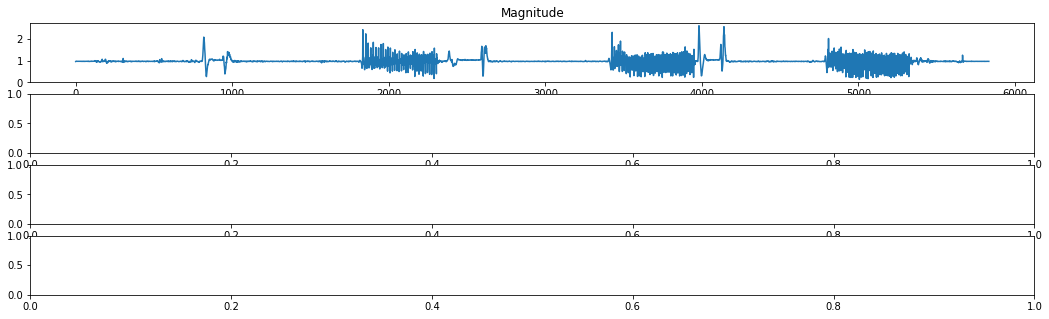

HTML(value='<b>ftap-lvl0-wrist _S2_2019-12-05T09.44.38.283_C49948A1895C_Gyroscope_1.4.5.csv</b>', layout=Layou…

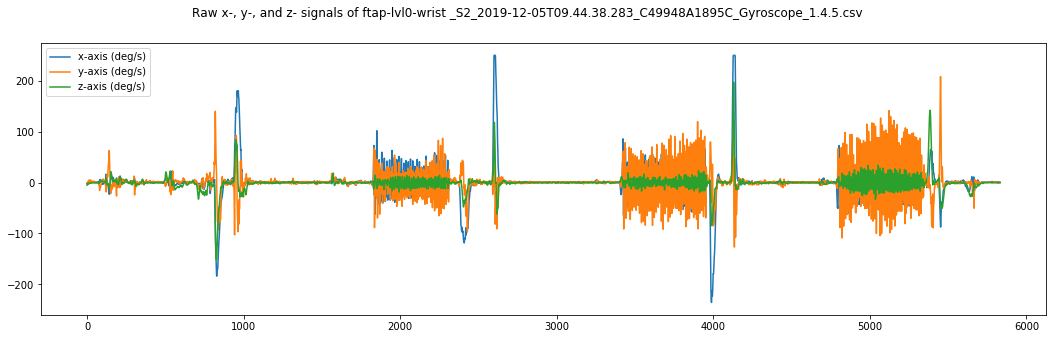

0.7259965718203649
-0.37953753856701955
-0.908103873842988
         epoch (ms)  elapsed (s)  x-axis (deg/s)  y-axis (deg/s)  \
count  5.834000e+03  5834.000000     5834.000000     5834.000000   
mean   1.575539e+12    57.961939        0.725997       -0.379538   
std    3.347248e+04    33.472477       34.113402       25.913870   
min    1.575539e+12     0.000000     -235.556000     -126.799000   
25%    1.575539e+12    28.981250       -1.181000       -2.544000   
50%    1.575539e+12    57.962500        0.694000        0.091000   
75%    1.575539e+12    86.942750        2.498000        2.170250   
max    1.575539e+12   115.922000      249.748000      208.079000   

       z-axis (deg/s)    magnitude  
count     5834.000000  5834.000000  
mean        -0.908104    23.056834  
std         15.828567    39.440888  
min       -151.532000     0.076837  
25%         -2.447000     1.679393  
50%         -0.297000     5.226084  
75%          0.913000    29.474027  
max        197.096000   318.0626

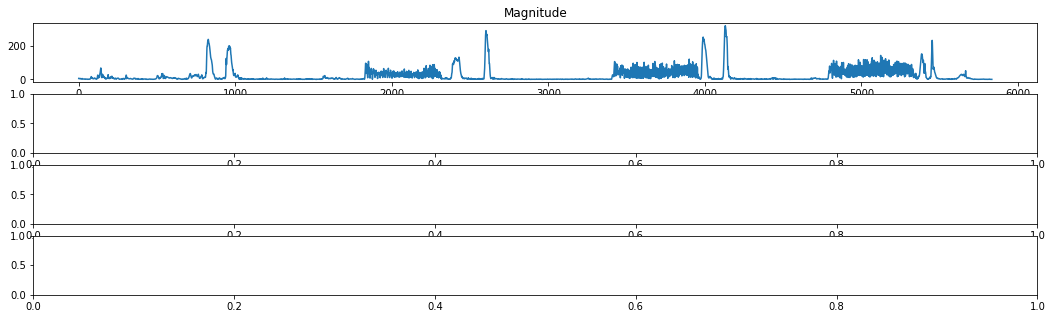

In [7]:
for file in files:
    study(pd.read_csv(path + file), title = file.split('\\')[1])

In [8]:
import matplotlib.pyplot as plt


import pandas as pd

In [9]:
def get_peaks(sgl, h = None):
    """
    Simple function to get the peaks of the signal
    
    If no minimum height is specified, the minimum height is taken to be the mean of the signal
    """
    if h is None: 
        h = statistics.mean(np.real(sgl))
        
    # Peaks index
    i_peaks = signal.find_peaks(sgl, height = h)[0]
    
    # Value of peaks
    v_peaks = []
    
    for i in i_peaks:
        v_peaks.append(sgl[i])
        
    return i_peaks, v_peaks

def plot(y, ypi = None, ypiv = None, hist = True, title = None):
    print(title)
    plt.figure(figsize=(16,5))
    plt.plot(y)
    plt.title(title)
    
    if ypi is not None and ypiv is not None:
        plt.plot(ypi, ypiv, 'xr')
        
    plt.show()
    
    if hist is True:
        try:
            df = pd.DataFrame(y)
            df.hist()
            print(df.describe())
        except:
            True
    
#     plt.show()

def test(df, describe = None):
    describe = ' ' + str(describe)
    
    import math

    df['mag'] = df.iloc[:, 3]**2 + df.iloc[:, 4]**2 + df.iloc[:, 5]**2
    df['mag'] = df['mag'].apply(math.sqrt)
    df['mag'] = df['mag'] - df.describe().loc['mean', 'mag']

    from scipy import signal
    import numpy as np

    freqs, times, spectrogram = signal.spectrogram(df['mag'].values, fs=50.0, nperseg=70, noverlap=70-1)
    df_ = pd.DataFrame({'time':times, 'freq':[freqs[i] for i in np.argmax(spectrogram,0)]})

    spec_mean = []

    spec_temp = [list(i) for i in zip(*spectrogram)]

    for sf in range(len(spec_temp)): 
        weighted_mean = 0

        for i in range(len(spec_temp[sf])):
            val = spec_temp[sf][i]
#             val *= (i + 1)
            
            weighted_mean += val

        weighted_mean /= len(spec_temp[sf])

        spec_mean.append(weighted_mean)

    spec_mean_fft = np.fft.fft(spec_mean)
    spec_mean_fft_dup =[]
    
    for i in spec_mean_fft:
        spec_mean_fft_dup.append(i)
    
    try:
#         for i in range(len(spec_mean_fft)):    
#             spec_mean_fft[i + 25] = 0
        for i in range(100):
            spec_mean_fft[i] = 0
    except:
        True
 
    mean_of_spec_mean = statistics.mean(spec_mean)
        
    spec_mean_peaks_i, spec_mean_peaks_ival = get_peaks(spec_mean, mean_of_spec_mean)
    
    spec_mean_fft_peaks_i, spec_mean_fft_peaks_ival = get_peaks(spec_mean_fft)
#     spec_mean_fft_peaks_i = signal.find_peaks(spec_mean_fft)[0]
#     spec_mean_fft_peaks_ival = []
    
#     for i in spec_mean_fft_peaks_i:
# #         print(i)
# #         try:
#             spec_mean_fft_peaks_ival.append(spec_mean_fft[i])
# #         except:
# #             print(i)

# #     print(spec_mean_fft_peaks_i)
# #     print(len(spec_mean_fft_peaks_ival))

    spec_mean_ifft = np.fft.ifft(spec_mean_fft)
    
    spec_mean_ifft_peaks_i, spec_mean_ifft_peaks_ival = get_peaks(spec_mean_ifft)
    
    sgl_fft = np.fft.fft(df['mag'])
    for i in range(int(len(sgl_fft) * 0.99)):
        sgl_fft[i] = 0
    sgl = np.fft.ifft(sgl_fft)
    
    # =====================
    import matplotlib.pyplot as plt
    import plotly.graph_objects as go

    %matplotlib inline

    lim = 200

#     plot(df.iloc[:, 6], title = 'Data' + describe)
    
    plt.figure(figsize=(16,5))
    plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
    plt.show()

#     plot(spec_mean, spec_mean_peaks_i, spec_mean_peaks_ival, title = 'Spectrogram mean' + describe)

#     spec_mean_fft_dup = spec_mean_fft_dup[0:lim]
#     plot(spec_mean_fft_dup, title = 'FFT' + describe)
    
#     plot(spec_mean_ifft, spec_mean_ifft_peaks_i, spec_mean_ifft_peaks_ival, title = 'Inverse truncated FFT' + describe)
    
#     spec_mean_fft = spec_mean_fft[0:lim]
# #     plot(spec_mean_fft, spec_mean_fft_peaks_i, spec_mean_fft_peaks_ival, title = 'Truncated FFT' + describe)
#     plot(spec_mean_fft, title = 'Truncated FFT' + describe)
    
#     plot(sgl, title = 'Fast truncated signal ' + describe)
#     plot(sgl_fft, title = 'Fast truncated signal (FFT) ' + describe)

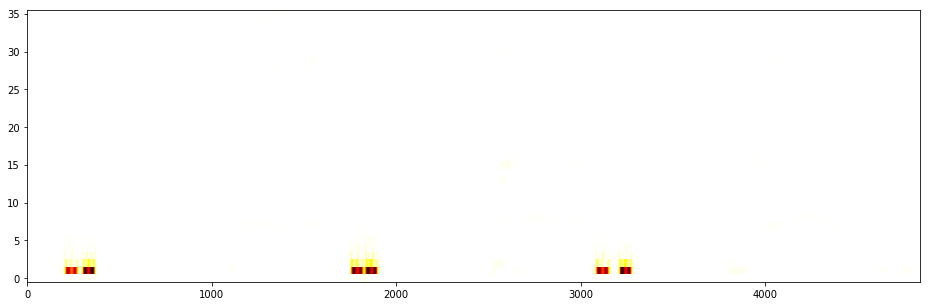

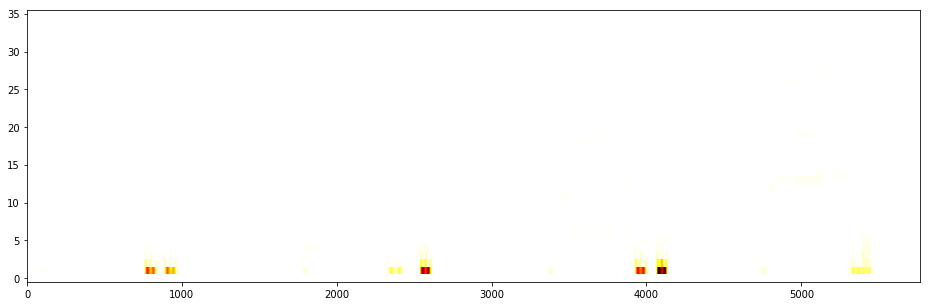

In [10]:
a = [0, 1]
a = [0, 1, 2, 3]
a = [1, 3]

for i in a:
    df = pd.read_csv(path + files[i])
    test(df, describe=files[i])
    for j in range(126): 
        print('=', end='')
    print()

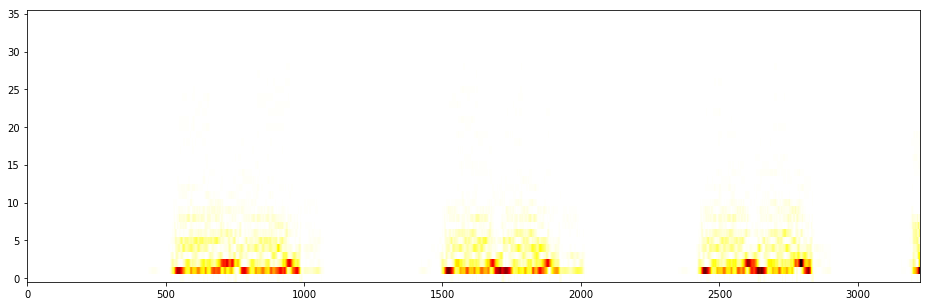

In [11]:
def get_peaks(sgl, h = None):
    """
    Simple function to get the peaks of the signal
    
    If no minimum height is specified, the minimum height is taken to be the mean of the signal
    """
    if h is None: 
        h = statistics.mean(np.real(sgl))
    
    h = min(sgl) + (max(sgl) - min(sgl)) * 0.01
    
    # Peaks index
    i_peaks = signal.find_peaks(sgl, height = h)[0]
    
    # Value of peaks
    v_peaks = []
    
    for i in i_peaks:
        v_peaks.append(sgl[i])
        
    return i_peaks, v_peaks

a = [0]


files = [
    'tugt-heel\\tugt-lvl0-heel_S2_2019-12-10T15.27.34.039_C49948A1895C_Gyroscope_1.4.5.csv',
]

for i in a:
    df = pd.read_csv(path + files[i])
    test(df, describe=files[i])
    for j in range(126): 
        print('=', end='')
    print()

In [12]:
def get_peaks(sgl, h = None):
    """
    Simple function to get the peaks of the signal
    
    If no minimum height is specified, the minimum height is taken to be the mean of the signal
    """
    if h is None: 
        h = statistics.mean(np.real(sgl))
        
    # Peaks index
    i_peaks = signal.find_peaks(sgl, height = h)[0]
    
    # Value of peaks
    v_peaks = []
    
    for i in i_peaks:
        v_peaks.append(sgl[i])
        
    return i_peaks, v_peaks

def plot(y, ypi = None, ypiv = None, hist = True, title = None):
    print(title)
    plt.figure(figsize=(16,5))
    plt.plot(y)
    plt.title(title)
    
    if ypi is not None and ypiv is not None:
        plt.plot(ypi, ypiv, 'xr')
        
    plt.show()
    
    if hist is True:
        try:
            df = pd.DataFrame(y)
            df.hist()
            print(df.describe())
        except:
            True
    
#     plt.show()

def test(df, describe = None):
    describe = ' ' + str(describe)
    
    import math

    df['mag'] = df.iloc[:, 3]**2 + df.iloc[:, 4]**2 + df.iloc[:, 5]**2
    df['mag'] = df['mag'].apply(math.sqrt)
    df['mag'] = df['mag'] - df.describe().loc['mean', 'mag']

    from scipy import signal
    import numpy as np

#     freqs, times, spectrogram = signal.spectrogram(df['mag'].values, fs=50.0, nperseg=70, noverlap=70-1)
#     df_ = pd.DataFrame({'time':times, 'freq':[freqs[i] for i in np.argmax(spectrogram,0)]})

#     spec_mean = []

#     spec_temp = [list(i) for i in zip(*spectrogram)]

#     for sf in range(len(spec_temp)): 
#         weighted_mean = 0

#         for i in range(len(spec_temp[sf])):
#             val = spec_temp[sf][i]
# #             val *= (i + 1)
            
#             weighted_mean += val

#         weighted_mean /= len(spec_temp[sf])

#         spec_mean.append(weighted_mean)

#     spec_mean_fft = np.fft.fft(spec_mean)
#     spec_mean_fft_dup =[]
    
#     for i in spec_mean_fft:
#         spec_mean_fft_dup.append(i)
    
#     try:
# #         for i in range(len(spec_mean_fft)):    
# #             spec_mean_fft[i + 25] = 0
#         for i in range(100):
#             spec_mean_fft[i] = 0
#     except:
#         True
 
#     mean_of_spec_mean = statistics.mean(spec_mean)
        
#     spec_mean_peaks_i, spec_mean_peaks_ival = get_peaks(spec_mean, mean_of_spec_mean)
    
#     spec_mean_fft_peaks_i, spec_mean_fft_peaks_ival = get_peaks(spec_mean_fft)
#     spec_mean_fft_peaks_i = signal.find_peaks(spec_mean_fft)[0]
#     spec_mean_fft_peaks_ival = []
    
#     for i in spec_mean_fft_peaks_i:
# #         print(i)
# #         try:
#             spec_mean_fft_peaks_ival.append(spec_mean_fft[i])
# #         except:
# #             print(i)

# #     print(spec_mean_fft_peaks_i)
# #     print(len(spec_mean_fft_peaks_ival))

#     spec_mean_ifft = np.fft.ifft(spec_mean_fft)
    
#     spec_mean_ifft_peaks_i, spec_mean_ifft_peaks_ival = get_peaks(spec_mean_ifft)
    
#     sgl_fft = np.fft.fft(df['mag'])
#     for i in range(int(len(sgl_fft) * 0.99)):
#         sgl_fft[i] = 0
#     sgl = np.fft.ifft(sgl_fft)
    
    # =====================
    import matplotlib.pyplot as plt
    import plotly.graph_objects as go

    %matplotlib inline

    lim = 200

#     plot(df.iloc[:, 6], title = 'Data' + describe)
    
    for bin in [2]:
        print(bin)
        freqs, times, spectrogram = signal.spectrogram(df['mag'].values, fs=50.0, nperseg=bin, noverlap=bin-1)

        plt.figure(figsize=(16,5))
        plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
        plt.show()

#     plot(spec_mean, spec_mean_peaks_i, spec_mean_peaks_ival, title = 'Spectrogram mean' + describe)

#     spec_mean_fft_dup = spec_mean_fft_dup[0:lim]
#     plot(spec_mean_fft_dup, title = 'FFT' + describe)
    
#     plot(spec_mean_ifft, spec_mean_ifft_peaks_i, spec_mean_ifft_peaks_ival, title = 'Inverse truncated FFT' + describe)
    
#     spec_mean_fft = spec_mean_fft[0:lim]
# #     plot(spec_mean_fft, spec_mean_fft_peaks_i, spec_mean_fft_peaks_ival, title = 'Truncated FFT' + describe)
#     plot(spec_mean_fft, title = 'Truncated FFT' + describe)
    
#     plot(sgl, title = 'Fast truncated signal ' + describe)
#     plot(sgl_fft, title = 'Fast truncated signal (FFT) ' + describe)

2


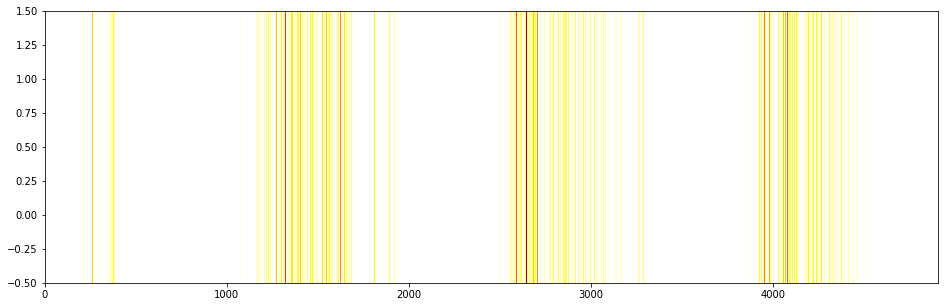

In [13]:
# === FILES ===
path = 'C:\\Users\\liong\\Jupyter Notebook\\191020_Fourth Year Project\\Parkinson-Disease-Repository\\Data\\Patient001-2019-12-05\\'

files = ['ftap-forearm\\ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5.csv',
 'ftap-forearm\\ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Gyroscope_1.4.5.csv',
 'ftap-wrist\\ftap-lvl0-wrist _S2_2019-12-05T09.44.38.283_C49948A1895C_Accelerometer_1.4.5.csv',
 'ftap-wrist\\ftap-lvl0-wrist _S2_2019-12-05T09.44.38.283_C49948A1895C_Gyroscope_1.4.5.csv']

a = [0, 1]
a = [0, 1, 2, 3]
# a = [1, 3]
a = [1]

for i in a:
    df = pd.read_csv(path + files[i])
    test(df, describe=files[i])
    for j in range(126): 
        print('=', end='')
    print()

In [14]:
True

True